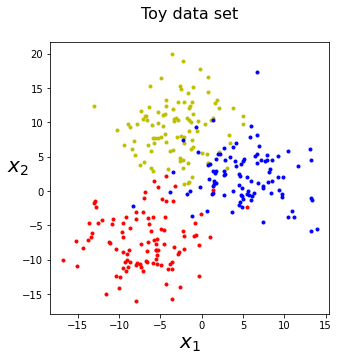

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, n_features=2, centers=3,
                  cluster_std=4, random_state=42)

# Plot data
plt.figure(figsize=(5, 5))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", marker='.')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", marker='.')
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rd", marker='.')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.title("Toy data set\n", fontsize=16)
plt.show()

In [2]:
# https://github.com/lee-ju/stat_modeling

def compute_decision_boundaries(clf, x, y):
    mn_x1, mx_x1 = int(x[:,0].min())-1, int(x[:,0].max()+1)
    mn_x2, mx_x2 = int(x[:,1].min())-1, int(x[:,1].max()+1)
    x1s = np.linspace(mn_x1, mx_x1, 300)
    x2s = np.linspace(mn_x1, mx_x2, 300)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    
    axes = [mn_x1, mx_x1, mn_x2, mx_x2]
    return x1, x2, y_pred, axes

def plot_feature_space(clf, x, y):
    x1, x2, y_pred, axes = compute_decision_boundaries(clf, x, y)
    custom_cmap = ListedColormap(['y','b','r'])

    plt.figure(figsize=(5, 5))
    plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.1)
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo", marker='.')
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs", marker='.')
    plt.plot(x[:, 0][y==2], x[:, 1][y==2], "rd", marker='.')
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.show()

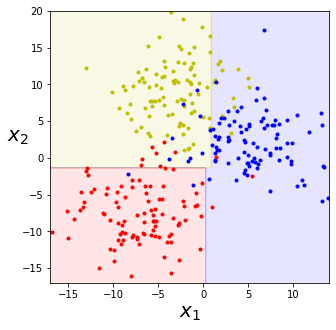

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(max_depth=2).fit(X, y)
plot_feature_space(clf_dt, X, y)

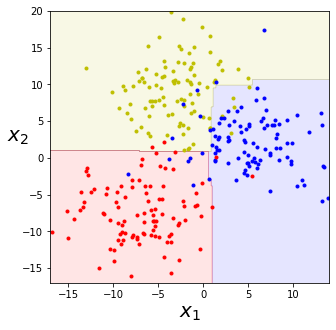

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf_rf10 = RandomForestClassifier(max_depth=2, n_estimators=10).fit(X, y)
plot_feature_space(clf_rf10, X, y)

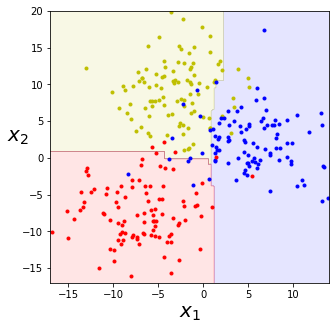

In [5]:
clf_rf50 = RandomForestClassifier(max_depth=2, n_estimators=50).fit(X, y)
plot_feature_space(clf_rf50, X, y)

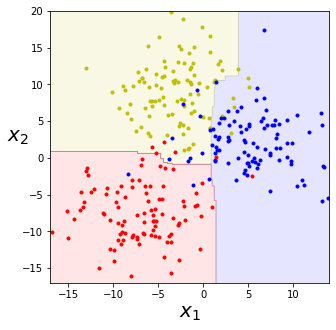

In [6]:
clf_rf100 = RandomForestClassifier(max_depth=2, n_estimators=100).fit(X, y)
plot_feature_space(clf_rf100, X, y)